# Question 1: Calculating Quantum Mechanical Observables
For a spinless particle in a simple harmonic oscillator (SHO) potential, the wavefunction for energy level $n$, $\psi_n (x)$, is given by:
\begin{equation}
    \psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}}e^{-x^2/2}H_n(x) \qquad (1)
\end{equation}
where $H_n$ is the $n^{th}$ Hermite polynomial defined recursively as:
\begin{equation}
    H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x) \qquad (2)
\end{equation}
with $H_o(x) = 1$, $H_1(x) = 2x$.
There derivative will be useful to us later and can be shown to be:
\begin{equation}
    \frac{\mathrm{d}\psi_n}{\mathrm{d}x} = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}}e^{-x^2/2}[-xH_n(x)+2nH_{n-1}(x)] \qquad (3)
\end{equation}
The expectation values for position and momentum, respectively, are given by the following:
\begin{equation}
    \langle x^2\rangle = \int_{-\infty}^{\infty} x^2 \mid\psi_n(x)\mid^2 \mathrm{dx}
\end{equation}
\begin{equation}
    \langle p^2 \rangle = \int_{-\infty}^{\infty} \mid\frac{\mathrm{d}\psi_n}{\mathrm{d}x}\mid^2 \mathrm{dx}
\end{equation}
And total energy is given by:
\begin{equation}
    E = \frac{1}{2}(\langle x^2\rangle + \langle p^2 \rangle)
\end{equation}
The uncertainty in position and momentum is given by the squareoot of the repsective expectation value. 

In [11]:
# Code for 2a) to compute Hermite polynomials
#import packages
import numpy as np
import seaborn as sns
from gaussxw import gaussxw
sns.set()

In [12]:
#define a function for Hermite polynomials
def H(n,x):
    h = np.empty(n+1)
    if n>=0:
        h[0] = 1
        if n>=1:
            h[1] = 2*x
        if n>=2:
            for m in range(2,n+1):
                h[m] = 2*x*h[m-1] - 2*(m-1)*h[m-2]
            
    else:
        h[n] = -1
        print('Error, x<0')
    return h[n]

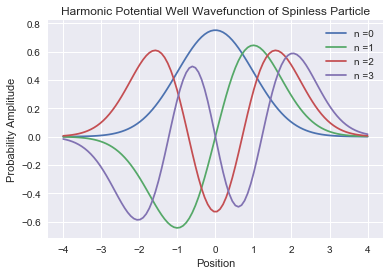

In [13]:
#define the wavefunction for the spinless point particle in a quadratic potential well
from scipy.special import factorial
def wavefunc(n,x):
    if np.isscalar(x) == True:
         psi = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x**2)/2)*H(n,x)
    else:
        L = len(x)
        psi = np.empty(L)
        for l in range(L):
            psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*H(n,x[l])
    return psi

x = np.linspace(-4,4, 100) # a range of points between -4 and 4 for plotting
N = np.arange(0,4) # an array of energy levels from 0 to 3
#for each value of N, plot the wavefunction on the interval [-4,4]
import matplotlib.pyplot as plt

plt.figure
plt.title('Harmonic Potential Well Wavefunction of Spinless Particle')
plt.xlabel('Position')
plt.ylabel('Probability Amplitude')
for i in range(len(N)):
    n = N[i]
    plt.plot(x, wavefunc(n,x),label = 'n ='+str(n))
    
plt.legend()


## Part a: Plot of $\psi_n (x)$ for $n = 0, 1, 2, 3,...$
Above is the plot of the wavefunction for the spinless particle in the harmonic potential well for $n = 0, 1, 2, 3,...$ on the interval $[-4, 4]$.

## Part b: Plot the wavefunction for n=30
See plot below.

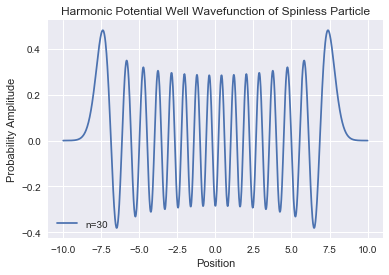

In [14]:
#2b)
x1 = np.linspace(-10,10, 1000) #a range of values between -10 and 10 for plotting wavefunction for n=30
n1 = 30 #energy level

plt.figure
plt.plot(x1, wavefunc(n1, x1), label = 'n=30') 
plt.title('Harmonic Potential Well Wavefunction of Spinless Particle')
plt.xlabel('Position')
plt.ylabel('Probability Amplitude')
plt.legend()

In [15]:
def Gaussian(function, i_N, f_a, f_b,i_n):
    """
    A function for performing numerical integration of the mathematical function according to
    Gaussian Quadrature for N steps between a and b. Basically ripped off Newman's gaussint.py
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_x,f_w = gaussxw(i_N)
    f_xp = 0.5*(f_b-f_a)*f_x + 0.5*(f_b+f_a)
    f_wp = 0.5*(f_b-f_a)*f_w
    
    # Perform the integration
    f_s = 0.0
    for k in range(i_N):
        f_s += f_wp[k]*function(f_xp[k],i_n)
    return f_s

In [16]:
def Position(a_z, i_n): 
    # Position takes in z based on a change of variable and the energy level i_n
    a_position = np.tan(a_z) ** 2 * wavefunc(i_n, np.tan(a_z)) ** 2 / np.cos(a_z) ** 2
    return a_position


In [17]:
def wavefunc_derivative(x,n):
    # calculates a value based on the derivative of the wave function
    # the derivative was taken analytically
    # like the wavefunction, there's a difference if you pass one value or an array
    if np.isscalar(x) == True:
        if n>0:
            psi = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x**2)/2)*(-x*H(n,x) + 2*n*H(n-1,x))
        else:
            psi = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x**2)/2)*(-x*H(n,x) + 0)
    else:
        L = len(x)
        psi = np.empty(L)
        for l in range(L):
            if n>0:
                psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*(-x[l]*H(n,x[l]) + 2*n*H(n-1,x[l]))
            else:
                psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*(-x[l]*H(n,x[l]) + 0)
    return psi

In [18]:
def Momentum(z, n): #integrand after coordinate transform for expectation value for momentum
        return wavefunc_derivative(np.tan(z),n)**2 / np.cos(z)**2

In [19]:
N = 100
a = -np.pi / 2 
b = np.pi / 2
n = 5
f_expx = Gaussian(Position, N, a,b,n )
f_expp = Gaussian(Momentum, N, a,b,n )
f_sigma_x = np.sqrt(f_expx)
f_sigma_p = np.sqrt(f_expp)
f_energy = (f_expx + f_expp)/2
print(np.sqrt(f_expx))
# testing for the correct value, close to 2.35

2.3452078797796547


## Part c: Relationship between uncertainty in position and uncertainty in momentum, and Energy and $n$
An interesting relationship is depicted in the plots below of uncertainty in momentum vs. uncertainty in position and total energy vs. energy level $n$. In particular, both of these plots depict linear relationships. This makes sense given that it is known that $E_n = (n+\frac{1}{2})\hbar \omega$, where $\hbar$ and $\omega$ are just constants, and this cleary indicates that energy scales linearly with $n$. Additionally, considering that $E = \frac{1}{2} (\langle x^2 \rangle + \langle p^2 \rangle)$, it is clear that it must be the case that the uncertainty in positon and the uncertainty in momentum must scale linearly with respect to one and other as $n$ increases (or else energy couldnt possibly go linearly with $n$). A simple linear fit reinforces this qualitative observation more strongly by noticing that the fit captures the trend depicted in the data very nicely, which is evident by the immensly small average magnitude of the calculated residuals for boths fits.

In [20]:
def linear(x,a,b):
    return a*x+b
def root(x,a,b):
    return a *np.sqrt(x) + b

Slope is ~1.0001441050056967
Slope is ~0.9999860618448373


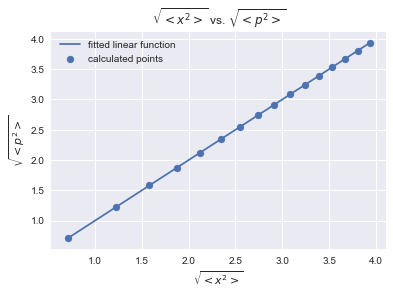

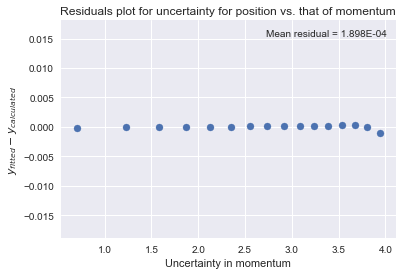

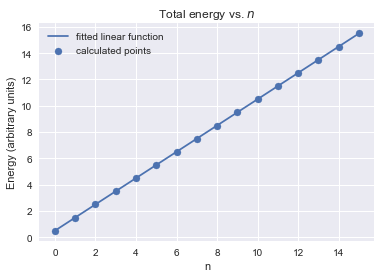

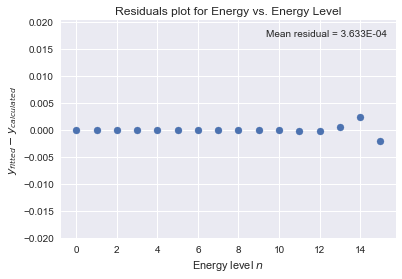

In [24]:
#plot <x^2>, <p^2> for n=0,1,2,...,15
#lets import curvefit tools to back up our claim of linearity
from scipy.optimize import curve_fit

a_elevels = np.arange(0,16) #an array with integers from 0 to 15 for energy levels
#pre-allocate memory for arrays to contain values for uncertainty in position and momentum as well as energy for n = 0,1,2,...15
a_uncertain_x = np.empty(len(a_elevels)) 
a_uncertain_p = np.empty(len(a_elevels))
a_energy  = np.empty(len(a_elevels))

for i in a_elevels: #calculate the values
    f_expx = Gaussian(Position, N, a,b,i )
    f_expp = Gaussian(Momentum, N, a,b,i )
    f_sigma_x = np.sqrt(f_expx)
    f_sigma_p = np.sqrt(f_expp)
    f_energy = (f_expx + f_expp)/2
    a_uncertain_x[i] = f_sigma_x
    a_uncertain_p[i] = f_sigma_p
    a_energy[i] = f_energy


p_opt1, p_cov1 = curve_fit(linear,a_uncertain_x, a_uncertain_p, p0 = (0.8,1))
p_opt2, p_cov2 = curve_fit(linear, a_elevels, a_energy, p0 = (0.8,1))

#plot expectation value for position agaisnt expectation value for momentum
plt.figure()
plt.scatter(a_uncertain_x, a_uncertain_p, label = 'calculated points')
plt.plot(a_uncertain_x,linear(a_uncertain_x,*p_opt1), label = 'fitted linear function')
plt.title('$\sqrt{<x^2>}$ vs. $\sqrt{<p^2>}$')
plt.xlabel('$\sqrt{<x^2>}$')
plt.ylabel('$\sqrt{<p^2>}$')
plt.legend()
print('Slope is ~{0}'.format(p_opt1[0]))

#residuals
import matplotlib.patches as mpatches
plt.figure()
a_res1 = linear(a_uncertain_x,*p_opt1)-a_uncertain_p
plt.scatter(a_uncertain_x, a_res1)
plt.title('Residuals plot for uncertainty for position vs. that of momentum')
plt.ylabel('$y_{fitted}-y_{calculated}$')
plt.xlabel('Uncertainty in momentum')
handles1 = []
extraString = 'Mean residual = {0:.3E}'.format(np.mean(abs(a_res1)))
handles1.append(mpatches.Patch(color='none', label=extraString))
plt.legend(handles = handles1)

#plot total energy vs energy level
plt.figure()
plt.scatter(a_elevels, a_energy, label = 'calculated points')
plt.plot(a_elevels,linear(a_elevels,*p_opt2), label = 'fitted linear function')
plt.title('Total energy vs. $n$')
plt.xlabel('n')
plt.ylabel('Energy (arbitrary units)')
plt.legend()
print('Slope is ~{0}'.format(p_opt2[0]))

#residuals
plt.figure()
a_res2 = linear(a_elevels,*p_opt2)-a_energy
plt.scatter(a_elevels, a_res2)
plt.title('Residuals plot for Energy vs. Energy Level')
plt.ylabel('$y_{fitted}-y_{calculated}$')
plt.xlabel('Energy level $n$')
handles2 = []
extraString = 'Mean residual = {0:.3E}'.format(np.mean(abs(a_res2)))
handles2.append(mpatches.Patch(color='none', label=extraString))
plt.legend(handles = handles2)
